In [22]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

#2020 population of Catalonia from https://www.idescat.cat/pub/?id=aec&n=245
popCatalunya = 7722203

#Catalonia's health department data https://dadescovid.cat/descarregues
resp = urlopen("https://dadescovid.cat/static/csv/catalunya_diari_total_pob.zip")
zipfile = ZipFile(BytesIO(resp.read()))
file = zipfile.namelist()[0]
df = pd.read_csv(zipfile.open(file), sep=";")
df.head()

,NOM,CODI,DATA,SEXE,GRUP_EDAT,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,...,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
0,CATALUNYA,GLOBAL,2021-01-23,Altres,NaN,15,23,12,0,1,...,33,0,4,11,3,2,23,12,0,0
1,CATALUNYA,GLOBAL,2021-01-23,Dona,Entre 15 i 64,311,1551,1641,0,6,...,58,0,32,279,32,230,1444,1533,1299,302
2,CATALUNYA,GLOBAL,2021-01-23,Dona,Entre 65 i 74,28,82,136,0,1,...,44,0,5,23,6,19,77,131,51,34
3,CATALUNYA,GLOBAL,2021-01-23,Dona,Majors de 74,47,275,363,2,1,...,30,0,11,36,10,30,231,315,296,541
4,CATALUNYA,GLOBAL,2021-01-23,Dona,Menors de 15,58,115,252,0,0,...,0,0,12,46,11,33,112,249,0,0


In [23]:
df["DATA"] = pd.to_datetime(df["DATA"])
dfagg = df.groupby("DATA").agg(sum)
dfagg.tail()

,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
DATA,,,,,,,,,,,,,,,,
2021-01-19,4348,52484,19404,315,50,2869,543,78,2106,2242,2297,2316,47724,18241,4255,475
2021-01-20,3692,50509,19614,281,66,2852,570,63,1640,2052,1863,2128,46285,18376,3091,1628
2021-01-21,3228,44827,18148,272,54,2913,580,35,1422,1806,1575,1950,41175,17028,2920,1496
2021-01-22,2516,22243,17126,231,66,2848,594,8,806,1710,942,1841,20103,16058,4811,1758
2021-01-23,837,3135,4111,6,29,2958,607,0,103,734,102,585,2880,3884,2213,1127


In [24]:
dfaggvac = dfagg[dfagg["VACUNATS_DOSI_1"]>0]
dfaggvac.reset_index(inplace=True)
dfaggvac['Weekend'] = np.where(dfaggvac["DATA"].dt.weekday < 5,0,1)
dfaggvac["1st dose percent"] = dfaggvac["VACUNATS_DOSI_1"].cumsum()/popCatalunya*100
dfaggvac["2nd dose percent"] = dfaggvac["VACUNATS_DOSI_2"].cumsum()/popCatalunya*100

dfaggvac.head()

,DATA,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2,Weekend,1st dose percent,2nd dose percent
0,2020-12-27,1130,4998,4121,165,31,1757,321,42,404,726,331,573,4620,3896,803,0,1,0.010399,0.0
1,2020-12-28,4024,21848,19981,240,35,1803,335,47,1410,2614,1238,2377,19534,18550,1,0,0,0.010412,0.0
2,2020-12-29,3980,26490,19708,243,27,1820,335,44,1547,2433,1492,2299,23782,18178,446,0,0,0.016187,0.0
3,2020-12-30,3768,27691,19683,226,23,1805,328,47,1490,2278,1531,2232,24693,18454,2581,0,0,0.049610,0.0
4,2020-12-31,3403,22462,17184,222,40,1772,340,47,1444,1959,1627,2007,20125,16146,2591,0,0,0.083163,0.0


<IPython.core.display.Javascript object>


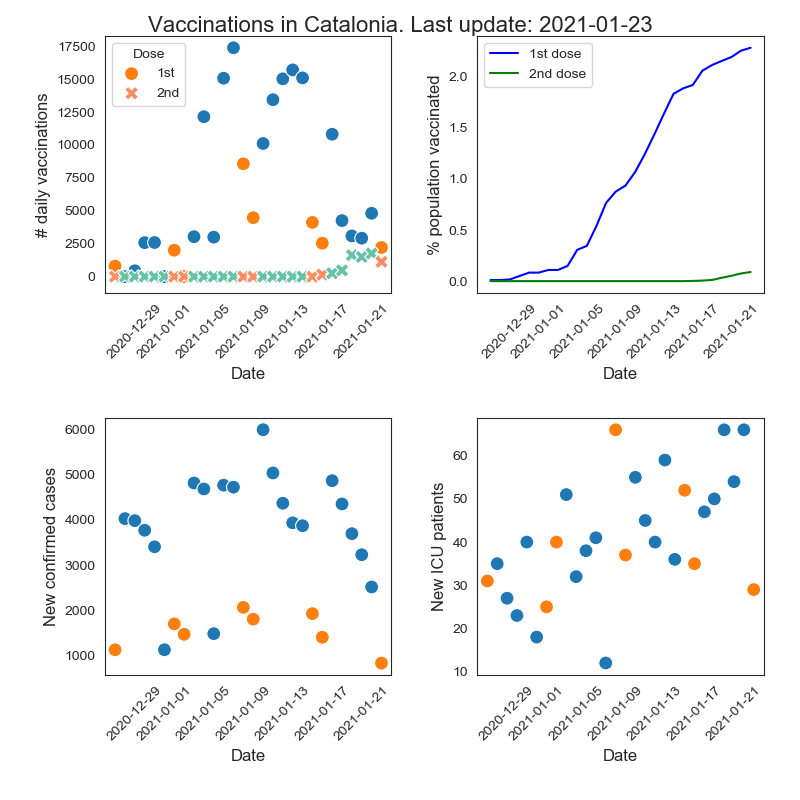

In [25]:
dmax = max(dfaggvac["DATA"]) + pd.DateOffset(1)
dmin = min(dfaggvac["DATA"]) - pd.DateOffset(1)
sns.set_style('white')


fig, axes = plt.subplots(2,2,figsize=(8,8))
fig.suptitle("Vaccinations in Catalonia. Last update: " + max(dfaggvac["DATA"]).strftime("%Y-%m-%d"), fontsize=16)

#sns.set(rc={'figure.figsize':(9,9)})

sns.scatterplot(ax= axes[0][0], data=dfaggvac, x="DATA", y="VACUNATS_DOSI_1", 
                hue="Weekend", s=100, label="1st dose", legend=False)
sns.scatterplot(ax= axes[0][0], data=dfaggvac, x="DATA", y="VACUNATS_DOSI_2", 
                hue="Weekend", palette="Set2", s=100, label="2nd dose", legend=False, marker="X")

axes[0][0].set_xlabel('Date', fontsize=12)
axes[0][0].set_ylabel('# daily vaccinations', fontsize=12)
axes[0][0].tick_params(axis='y')
axes[0][0].tick_params(axis="x",rotation=45)
axes[0][0].set_xlim(dmin, dmax)
#axes[0][0].legend([],[], frameon=False)
axes[0][0].legend(title='Dose', loc='upper left', labels=['1st', '2nd'])


sns.lineplot(ax= axes[0][1], x=dfaggvac["DATA"], y=dfaggvac["1st dose percent"], color="b", label="1st dose")
sns.lineplot(ax= axes[0][1], x=dfaggvac["DATA"], y=dfaggvac["2nd dose percent"], color="g", label="2nd dose")
axes[0][1].set_xlabel('Date', fontsize=12)
axes[0][1].set_ylabel('% population vaccinated', fontsize=12)
axes[0][1].tick_params(axis='y')
axes[0][1].tick_params(axis="x",rotation=45)

sns.scatterplot(ax= axes[1][0], data=dfaggvac, x="DATA", y="CASOS_CONFIRMAT", hue="Weekend", s=100)

axes[1][0].set_xlabel('Date', fontsize=12)
axes[1][0].set_ylabel('New confirmed cases', fontsize=12)
axes[1][0].tick_params(axis='y')
axes[1][0].tick_params(axis="x",rotation=45)
axes[1][0].set_xlim(dmin, dmax)
axes[1][0].legend([],[], frameon=False)

sns.scatterplot(ax= axes[1][1], data=dfaggvac, x="DATA", y="INGRESSOS_CRITIC", hue="Weekend", s=100)

axes[1][1].set_xlabel('Date', fontsize=12)
axes[1][1].set_ylabel('New ICU patients', fontsize=12)
axes[1][1].tick_params(axis='y')
axes[1][1].tick_params(axis="x",rotation=45)
axes[1][1].set_xlim(dmin, dmax)
axes[1][1].legend([],[], frameon=False)

fig.tight_layout(pad=2.6)